# Data Cleaning and Analysis of Empolyee Exit Surveys

This project was designed to practice and demonstrate data cleaning and analyses skills. The task is to use dataframes of the exit surveys from the Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE), to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
# Importing the necessary packages
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Plots graphs directly in cell
%matplotlib inline

# Reading the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Columns 

Look at the general overview of the datasets

In [2]:
# DETE survey
dete_survey.info()
dete_survey.head()
dete_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

* There are 822 entries
* There are columns with 18 boolean values
* Job dissatisfaction is determined by a simple boolean value (`True`/`False`)
* There's `NaN` values is the `DETE Start Date`, `Cease Date` and `Age columns`, which are columns of interest
* `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, `NESB` have 700+ missing values and are candidates to be dropped
* `Age`, `Cease Date`, `DETE Start Date` and `Role Start Date` columns are strings
* Some missing data are classified by the string _Not Stated_ 

In [3]:
# Tafe survey
tafe_survey.info()
tafe_survey.head()
tafe_survey.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

* There are 702 entries 
* There are no columns with integers or boolean values
* Columns with Contributing Factors all have 265 missing values, which are columns indicating reasons for dissatisfaction, therefore will need to be combined for further analysis
* Additionally, there are 106 missing values in `CurrentAge`. `CurrentAge` column

Each dataset has information indicating the reasons for dissatisfaction resulting in resignation, therefore need to be combined and cleaned for further analysis.

Next steps:

1. Change the _Not Stated_ strings into `NaN` values so that Pandas can recognise
3. Of the necessary data, find the corresponding column in each dataset, and rename them under the same name 
2. Decide what factors can be classified as dissatisfaction and combine them into one column
4. Combine the time spent working, from the `LengthofServiceOverall` column from the DETE survey, and the `Overall Length of Service at Institute (in years)`  from the TAFE survey 
5. When combining the data, make sure to remove all the columns that are not relevant to answering our initial questions 

## Replacing 'Not Stated' with NaN for Pandas to Recognise

We firstly replace _Not Stated_ values with `NaN` values, and then we drop all the columns not needed in our analysis.

In [4]:
# Reassinging the dataframe 
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# DETE survey, dropping columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
# TAFE survey, dropping columns 
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

These columns contain information about the opinions of the employees about the workplace. For a more nuanced analysis this may be beneficial, however we only need to know the reasons for their resignation, therefore these columns were dropped.

## Renaming Columns 

We can identify that there are some columns with different names and datatypes, but represent the same data e.g. `LengthofServiceOverall. Overall Length of Service at Institute (in years)`  and `LengthofServiceOverall`. Therefore, first step in combining the data will require standardizing the columns names.

In [5]:
# Renaming the DETE survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [6]:
# Renaming the TAFE survey columns
cols = {'Record ID': 'id',
      'CESSATION YEAR': 'cease_date',
      'Reason for ceasing employment': 'separationtype',
      'Gender. What is your Gender?': 'gender',
      'CurrentAge. Current Age': 'age',
      'Employment Type. Employment Type': 'employment_status',
      'Classification. Classification': 'position',
      'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
      'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
        }
tafe_survey_updated = tafe_survey_updated.rename(cols, axis=1)

The columns were standardized to snake case format.

In [7]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
# DETE survey separation types
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [10]:
# TAFE survey separation types
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

The only separation type we are  interested in, is `Resignation`.  Therefore, we will select only the rows with the `Resignation` separation type, which can be done using the `Series.str.contains()`  method. 

However, there is  a `NaN` value in the TAFE survey `separationtype` column that will need to be removed.

In [11]:
# Exctracting resignation data from the DETE survey 
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(r"Resignation")].copy()

# Checking the new series 
dete_resignations["separationtype"].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [12]:
# Exctracting resignation data from TAFE survey
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated["separationtype"].notna()].copy() # Drop NaN values
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")]

# Checking the new series
tafe_resignations["separationtype"].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

## Checking for Inconsistent Data

We do not want to assume that our data does not contain any inconsistencies, otherwise the analysis we perform would be invalid, due to the corruption of our data.

We will investigate `cease_date` and the `dete_start_date` columns to ensure everything makes sense.

It would not make sense to have any years past the current date (the last date the dataset was updated). Furthermore, most people start working in their 20s, so it would be unlikely to see `dete_start_date` values before 1940.

In [13]:
# Finding unique values is cease_date
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

The data has 11 `NaN` values, we will need to drop these values, as to not affect our analysis. Apart from that, the data seems reasonable.

We need to extract the only the years and reassign them back to the `cease_date` column, then convert the str into a float.

In [14]:
# Extract the year and convert it to float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

# Check if the data is correct
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Looking at the series it seems as though we have successfully extracted the year values from the `cease_date` column in the DETE survey data. e.g. 2012: 126+2+1 = 129

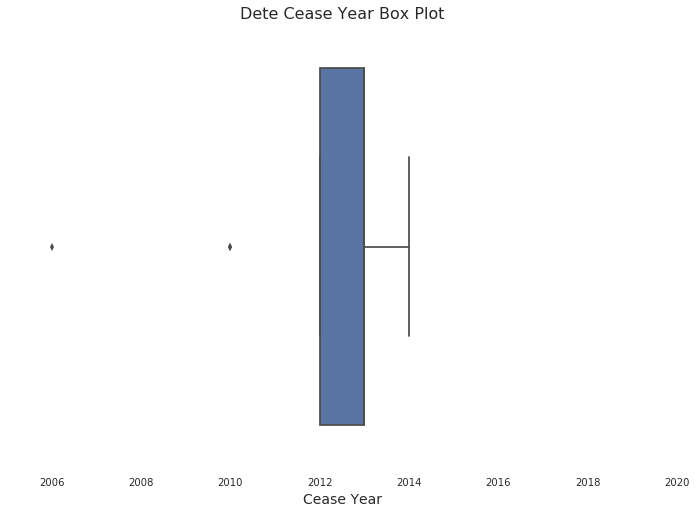

In [15]:
# Defining the plot
plt.figure(figsize=(12,8))
sns.set_style("white")
box_plot = sns.boxplot(dete_resignations["cease_date"])

# Plot axis and titles
plt.title("Dete Cease Year Box Plot", fontsize=16)
plt.xlabel("Cease Year", fontsize=14)
plt.xlim(2005, 2020)

# Despining
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

The boxplot shows that dates before 2012 are outliers and should be removed.

In [16]:
# Locating the values we want to remove
r = [2010, 2006]
for y in r:
    dete_resignations = dete_resignations[~(dete_resignations["cease_date"] == y)] 

# Checking to see if the values were removed
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
Name: cease_date, dtype: int64

Now it's time to check the `dete_start_date` column values, to identify any irregularities.

In [17]:
# Finding unique values in dete_start_date
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    20
2006.0    12
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     7
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

It shows that the earliest someone started working was in 1963, a good 23 years before 1940. Furthermore, the number of people that started working each year decreases as the years get older. Overall, the data appears plausible.

The data depicts only the year, there and are already float types, so no transformation needed.

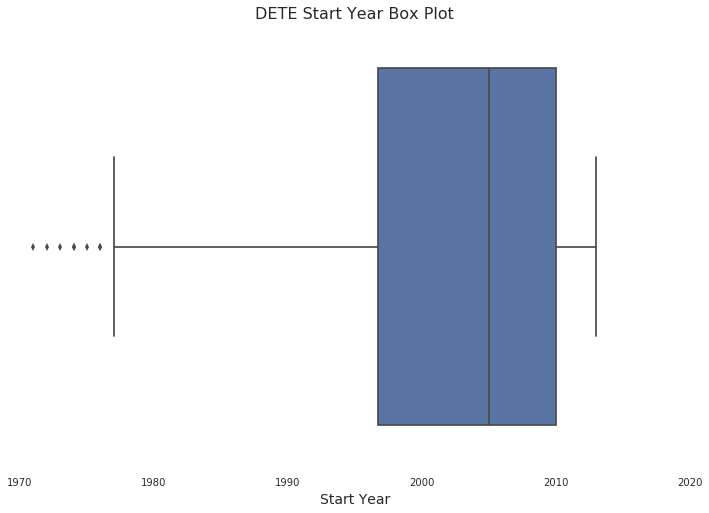

In [18]:
# Defining plot
plt.figure(figsize=(12,8))
sns.set_style("white")
box_plot = sns.boxplot(dete_resignations["dete_start_date"])

# Labeling plot axis and title
plt.title("DETE Start Year Box Plot", fontsize=16)
plt.xlabel("Start Year", fontsize=14)
plt.xlim(1970, 2020)

# Despining
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

It can be seen that all years before 1980 are depicted as outliers, and therefore can be dropped.

In [19]:
# Locating the values we want to remove
r = [1977.0, 1976.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1963.0]
for y in r:
    dete_resignations = dete_resignations[~(dete_resignations["dete_start_date"] == y)]
    
# Checking to see if the values were removed
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    20
2006.0    12
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     7
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
Name: dete_start_date, dtype: int64

Now to check the values in the TAFE survey `cease_date` column.

In [20]:
tafe_resignations["cease_date"].value_counts(ascending=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Similarly, to the `cease_date` column in the DETE survey data, years before 2010 seem to be outliers. We will again use a boxplot to depict this.

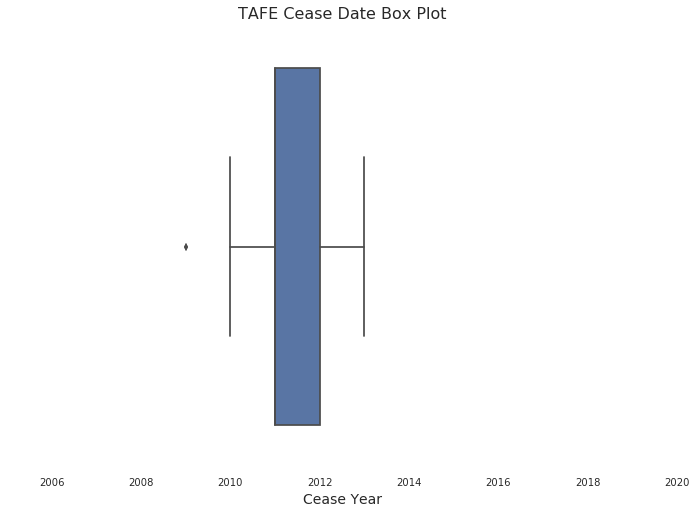

In [21]:
# Defining plot
plt.figure(figsize=(12,8))
sns.set_style("white")
box_plot = sns.boxplot(tafe_resignations["cease_date"])

# Labeling plot axis and title
plt.title("TAFE Cease Date Box Plot", fontsize=16)
plt.xlabel("Cease Year", fontsize=14)
plt.xlim(2005, 2020)

# Despining
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

In [22]:
# Locating values we want to remove
tafe_resignations = tafe_resignations[~(tafe_resignations["cease_date"] == 2009)]

# Checking to see if the values have been removed
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
Name: cease_date, dtype: int64

## Creating New Columns

Now that we've identified and checked over the data, we need to answer our questions, we now look to combine the datasets under new columns for further analysis.

The question we want to answer is:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

To answer this question, we need to locate data that indicate the time spent at work before resignation from both dataframes. In the TAFE survey dataframe, we already have a column named `institute_service` that details the years spent at the company. However, the DETE survey dataframe does not have one such column, therefore we need to create this column ourselves by subtracting `dete_start_date` from `cease_date`.

In [23]:
tafe_resignations["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   61
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [24]:
# Creating a new institute_service column
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations[["cease_date", "dete_start_date","institute_service"]].head()

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0


In [25]:
dete_resignations["institute_service"].value_counts().sort_index(ascending=False)

34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     3
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     19
2.0     14
1.0     22
0.0     19
Name: institute_service, dtype: int64

Looks as though 19 people worked at the company for less than a year.

We now need to identify those employees that resigned due to dissatisfaction, we have columns from both dataframes that categorise employee's dissatisfaction.

For TAFE survey:

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

For DETE survey:

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

For both dataframes, we will convert the values to `True`, `False` boolean values and `NaN` for missing values, to add cohesiveness to the data, making it easier for analysis.

We will first take a look at the TAFE survey values.

In [26]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         275
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      268
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We need to create a function that transforms the data as follows:

* If the value is `NaN` return `np.nan`
* If the value is '-' return `False` as we can assume that they do not represent missing values, because missing values are represented by `NaN`
* For any other values, return `True`

In [28]:
# Creating the function
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

We can now call the function and apply it to the dataframe, using the `DataFrame.applymap()` method.

In [29]:
# Creating a copy to avoid SettingwithCopy warning
tafe_resignations_up = tafe_resignations.copy()

# Transforming the values
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations["Contributing Factors. Dissatisfaction"].apply(update_vals)
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations["Contributing Factors. Job Dissatisfaction"].apply(update_vals)

In [30]:
# Using the df.any() method and creating a dissatisfied column
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna=False)

# Checking if the new column contains boolean values
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    239
True      91
NaN        8
Name: dissatisfied, dtype: int64

We have amalgamated the columns into one column that we can analyse later on. We now need to do the same for the DETE survey dataframe, with all the columns that indicate dissatisfaction as stated before. 

As all the columns we're using from the DETE survey dataframe are already boolean values, the `update_vals` function isn't needed here.

In [31]:
# Creating a copy to avoid SettingwithCopy warning
dete_resignations_up = dete_resignations.copy()

# Using the df.any() method and creating a dissatisfied column
dete_resignations_up["dissatisfied"] = dete_resignations[[
                                                        "job_dissatisfaction",
                                                        "dissatisfaction_with_the_department",
                                                        "physical_work_environment",
                                                        "lack_of_recognition",
                                                        "lack_of_job_security",
                                                        "work_location",
                                                        "employment_conditions",
                                                        "work_life_balance",
                                                        "workload"
                                                         ]].any(axis=1, skipna=False)

# Checking new column
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    156
True     142
Name: dissatisfied, dtype: int64

## Combining Datasets

We are now ready to combine our datasets. We will first add a column in both dataframes, that details the company the data represents.

In [32]:
# Creating a new institute column for both dataframes
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

We do not want a dataframe with columns that are irrelevant in our analysis, so before we combine the dataframes, we should select only the columns we need. These will be the columns that are identical in each dataframe.

In [33]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute'],
      dtype='object')

In [34]:
tafe_resignations_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute'],
      dtype='object')

In [35]:
# Selecting the relevant columns
same_cols = ["id", "cease_date", "separationtype",
             "position", "employment_status", "gender",
            "age", "institute_service", "dissatisfied",
             "institute"]

dete_resignations_up = dete_resignations_up[same_cols]
tafe_resignations_up = tafe_resignations_up[same_cols]

# Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 10 columns):
id                   636 non-null float64
cease_date           620 non-null float64
separationtype       636 non-null object
position             584 non-null object
employment_status    582 non-null object
gender               580 non-null object
age                  581 non-null object
institute_service    548 non-null object
dissatisfied         628 non-null object
institute            636 non-null object
dtypes: float64(2), object(8)
memory usage: 49.8+ KB


In [36]:
# Checking the non-null data
combined.notnull().sum().sort_values(ascending=False)

institute            636
separationtype       636
id                   636
dissatisfied         628
cease_date           620
position             584
employment_status    582
age                  581
gender               580
institute_service    548
dtype: int64

In [37]:
combined.head()

,id,cease_date,separationtype,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,2012.0,Resignation-Other reasons,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,2012.0,Resignation-Other reasons,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,2012.0,Resignation-Other reasons,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,2012.0,Resignation-Other employer,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,2012.0,Resignation-Move overseas/interstate,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


## Data Cleaning - Service Categories 

We now have to clean up the `institute_service` column to get it ready for analysis.

In [38]:
combined["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   61
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   19
3.0                   19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
22.0                   6
17.0                   6
14.0                   6
12.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
21.0                   3
32.0                   3
19.0                   3
11.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
27.0                   1
29.0                   1


As we can see, the dataset contains various datatypes, which can make it difficult to clean. Therefore, categorizing each value/range of values using this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), from businesswire.com, that values an employee's experience rather than their age. The categories are as follows:

* __New__: Less than 3 years at a company
* __Experienced__: 3-6 years at a company
* __Established__: 7-10 years at a company
* __Veteran__: 11 or more years at a company

In [39]:
# Extracting and converting the years into floats
combined["institute_service"] = combined["institute_service"].astype(str).str.extract(r"(\d+)")
combined["institute_service"] = combined["institute_service"].astype(float)

# Checking the tranformed values
combined["institute_service"].value_counts(dropna=False).sort_index()

 0.0      19
 1.0     159
 2.0      14
 3.0      80
 4.0      16
 5.0      56
 6.0      17
 7.0      34
 8.0       8
 9.0      14
 10.0      6
 11.0     29
 12.0      6
 13.0      8
 14.0      6
 15.0      7
 16.0      5
 17.0      6
 18.0      5
 19.0      3
 20.0     17
 21.0      3
 22.0      6
 23.0      4
 24.0      4
 25.0      2
 26.0      2
 27.0      1
 28.0      2
 29.0      1
 30.0      2
 31.0      1
 32.0      3
 33.0      1
 34.0      1
NaN       88
Name: institute_service, dtype: int64

The years have been successfully extracted.

Now to define the function `service_cats`, and transform all the data in the `institute_service` column.

In [40]:
# Defining the function used to determine service categories
def service_cats(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return "New"
    elif year >= 3 and year < 7:
        return "Experienced"
    elif year >= 7 and year < 11:
        return "Established"
    elif year >= 11:
        return "Veteran"

In [41]:
# Applying function to the institute_service column
combined["service_cat"] = combined["institute_service"].apply(service_cats)

combined["service_cat"].value_counts(dropna=False)

New            192
Experienced    169
Veteran        125
NaN             88
Established     62
Name: service_cat, dtype: int64

## Data Analysis - Service Categories

We can now start aggregating the data and conduct data analysis. 

We will start by aggregating the `dissatisfied` column using the `df.pivot_table()` method for the `True`, `False` and `NaN` values.

In [42]:
# Checking the number of True, False and NaN values 
combined["dissatisfied"].value_counts(dropna=False)

False    395
True     233
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
# Filling the missing values with False
combined["dissatisfied"] = combined["dissatisfied"].fillna(False)

combined["dissatisfied"].value_counts(dropna=False)

False    403
True     233
Name: dissatisfied, dtype: int64

We can use a pivot table to calculate the percentage of dissatisfied employees in each `service_cat` group. The pivot table will carry out the default mean aggregation function, then we will use the `df.plot()` method to create visualizations of the data through bar plots for analysis.

In [44]:
# Creating the dissatisfied, service_cat pivot table
dissatisfied_service_pv = combined.pivot_table(values="dissatisfied", index="service_cat")

# Checking the results
dissatisfied_service_pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.349112
New,0.296875
Veteran,0.472000


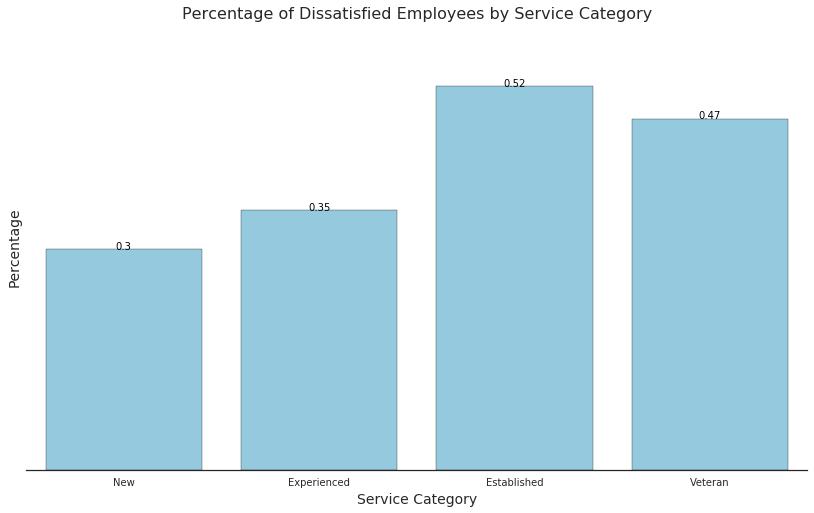

In [45]:
# Reordering the service categories
new_order = ["New", "Experienced", "Established", "Veteran"]
dissatisfied_service_pv = dissatisfied_service_pv.reindex(new_order)

# Resetting the pivot table with the reodered indices
dissatisfied_service_pv.reset_index(inplace=True)

# Configuring the bar plot of the pivot table
plt.figure(figsize=(14,8))
sns.set_style("white")

serv_cat_plot = sns.barplot(x="service_cat", y="dissatisfied",
                            data=dissatisfied_service_pv, color="skyblue")

# Adding labels
plt.title("Percentage of Dissatisfied Employees by Service Category", fontsize=16)
plt.xlabel("Service Category", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.yticks([])

# Removing spines 
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Annotating the plot
for i, r in dissatisfied_service_pv.iterrows():
    serv_cat_plot.text(r.name, r.dissatisfied, round(r.dissatisfied,2), color='black', ha="center")
    


As can be seen, the `Established` and `Veteran` categories have the highest percentage of dissatisfied employees. We can conclude that employees with 7+ years of service are more dissatisfied.

## Data Cleaning - Generation Categories

We begin to answer the second question:

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Similarly to the `institute_service` column we need to clean and group the index values for the `age` column, in preparation for data analysis.

In [46]:
# Inspecting age column values
combined["age"].value_counts(dropna=False)

51-55            67
NaN              55
41-45            47
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           31
56 or older      29
21-25            29
31-35            28
56-60            23
61 or older      18
20 or younger    10
Name: age, dtype: int64

Using this [article](https://www.kasasa.com/articles/generations/gen-x-gen-y-gen-z) we can group the ages according to their generational groups, to make the analysis easier.

In [47]:
# Extracting the year values from the age column
combined["age_gen"] = combined["age"].str.extract(r"(\d+)")
combined["age_gen"] = combined["age_gen"].astype(float)

combined["age_gen"].value_counts(dropna=False).sort_index()

 20.0    10
 21.0    62
 26.0    67
 31.0    60
 36.0    72
 41.0    92
 46.0    81
 51.0    67
 56.0    52
 61.0    18
NaN      55
Name: age_gen, dtype: int64

We have successfully extracted the age values from the `age` column and moved them to a new column called `age_gen`.

We will now implement a function to categorize the ages by generation as follows:

* __Gen Z__: Less or equal to 24
* __Millennials__: 25-39 years
* __Gen X__: 40-54 years 
* __Baby Boomers__: 55 and older

In [48]:
# Function to sort ages into their generational groups
def age_cats(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 24:
        return "Gen Z"
    elif age > 24 and age <= 39:
        return "Millennials"
    elif age > 39 and age <= 54:
        return "Gen X"
    else:
        return "Baby Boomers"

In [49]:
# Applying the function to the age_gen category
combined["age_gen"] = combined["age_gen"].apply(age_cats)
combined["age_gen"].value_counts(dropna=False)

Gen X           240
Millennials     199
Gen Z            72
Baby Boomers     70
NaN              55
Name: age_gen, dtype: int64

## Data Analysis - Generation Categories

In [50]:
# Creaing pivot table 
age_gen_pv = combined.pivot_table(values="dissatisfied", index="age_gen")
age_gen_pv

,dissatisfied
age_gen,
Baby Boomers,0.400000
Gen X,0.391667
Gen Z,0.291667
Millennials,0.381910


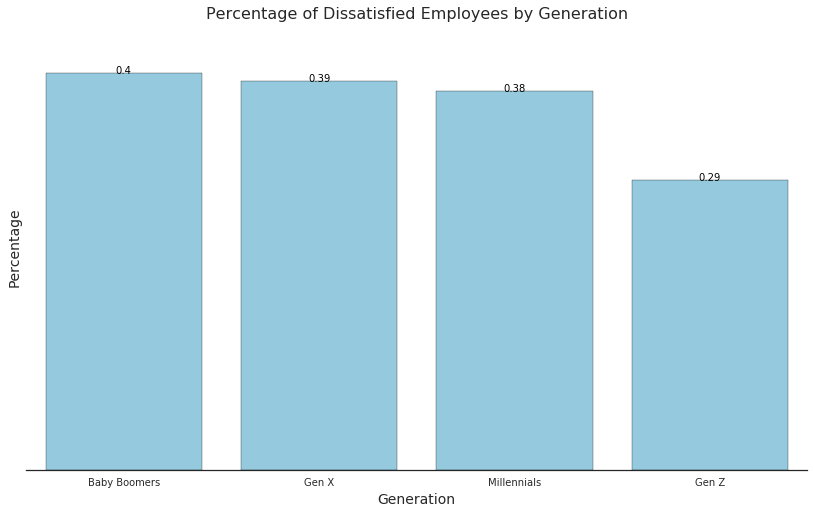

In [51]:
# New age category order
gen_order = ["Baby Boomers", "Gen X", "Millennials", "Gen Z"]
age_gen_pv = age_gen_pv.reindex(gen_order)

# Resetting the pivot table with the reodered indices
age_gen_pv.reset_index(inplace=True)

# Configuring the bar plot of the pivot table
plt.figure(figsize=(14,8))
sns.set_style("white")

plt_age = sns.barplot(x="age_gen", y="dissatisfied", data= age_gen_pv, color="skyblue")

# Adding labels
plt.title("Percentage of Dissatisfied Employees by Generation", fontsize=16)
plt.xlabel("Generation", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.yticks([])

# Removing spines 
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Annotating the plot
for i, r in age_gen_pv.iterrows():
    plt_age.text(r.name, r.dissatisfied, round(r.dissatisfied,2), color="black", ha="center")

The `Baby Boomers`, employees over the age of 54, are the most dissatisfied with their jobs. The `Gen Z`, employees under the age of 25, are the most satisfied with their job.

## Data Analysis - Service Category and Generation

We can combine the data from both the `service_cat` and `age_gen` to give an overall depiction of the factors contributing to employee dissatisfaction. 

It is important to be aware that it would be impossible for a `Gen Z` employee to also be a `Veteran`, furthermore it would be very unlikely for a `Baby Boomer` to be a `New` employee. Therefore, there we can expect a certain degree of bias in the results.

In [52]:
# Creating pivot table
dis_serv_age_pv = combined.pivot_table(values=
                                      "dissatisfied",
                                      index= "age_gen",
                                      columns= "service_cat")
# Checking pivot table
dis_serv_age_pv 

service_cat,Established,Experienced,New,Veteran
age_gen,,,,
Baby Boomers,0.400000,0.285714,0.400000,0.432432
Gen X,0.478261,0.338462,0.300000,0.544118
Gen Z,0.000000,0.291667,0.272727,NaN
Millennials,0.575758,0.393939,0.305556,0.315789


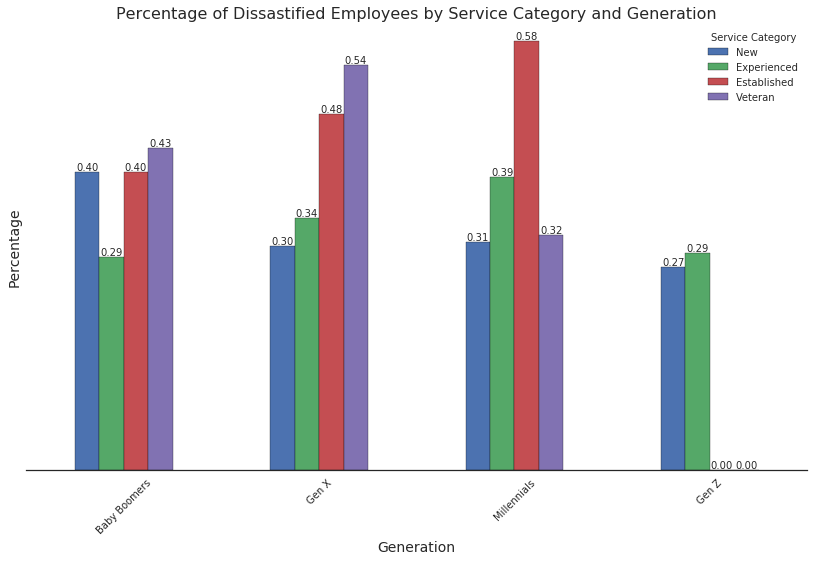

In [53]:
# Resetting the pivot table with the reodered indices
dis_serv_age_pv = dis_serv_age_pv.reindex(gen_order)
dis_serv_age_pv = dis_serv_age_pv[new_order]

# Configuring the bar plot of the pivot table
plt.figure(figsize=(14,8))
sns.set_style("white")

serv_age_plt = dis_serv_age_pv.plot(kind="bar",figsize=(14,8))

# Adding labels
plt.title("Percentage of Dissastified Employees by Service Category and Generation", fontsize=16)
plt.xlabel("Generation", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.yticks([])
plt.xticks(rotation=45)
plt.legend(title="Service Category", fontsize="medium")

# Removing spines
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Annotating the plot
def annotations(plot, rd=".2f"):
    for rect in plot.patches:
        plot.annotate(format(rect.get_height(), rd),
                      (rect.get_x() + rect.get_width() / 2.,
                      rect.get_height()), ha = "center",
                      va = "center", xytext = (0,5),
                     textcoords = "offset points")

annotations(serv_age_plt)

We can clearly see that the `Gen X` and `Baby Boomers` generations are less satisfied than the `Millennials` and `Gen Z` generations. The `Gen Z` generation was on average the most satisfied regardless of experience. 

Additionally, the plot suggests that the younger an `Established` person is, the increased probability that they are dissatisfied. 

## Inspecting Data Samples

We need to ensure that the data we have been using is reliable and valid data. We will inspect the sample sizes we have been working with and assess whether the sample size is big enough to draw accurate conclusions. 

Separately, we have verified that the `service_cat` and `age_gen` categories have sufficient data, however we need to analyse the number of data points that intersect both categories. Especially when looking at the `Veteran` and `Experienced` people that fall under the `Gen Z`, as there appears to be no data due to bias.

In [54]:
# Creating pivot table
size_pv = combined.pivot_table(values = "dissatisfied",
                              index = "age_gen",
                              columns = "service_cat",
                              fill_value = 0,
                              aggfunc = lambda x: len(x)
                              )
# Resetting the pivot table with the reodered indices
size_pv = size_pv.reindex(gen_order)
size_pv = size_pv[new_order]

# Checking pivot table 
size_pv

service_cat,New,Experienced,Established,Veteran
age_gen,,,,
Baby Boomers,5,14,5,37
Gen X,70,65,23,68
Millennials,72,66,33,19
Gen Z,44,24,1,0


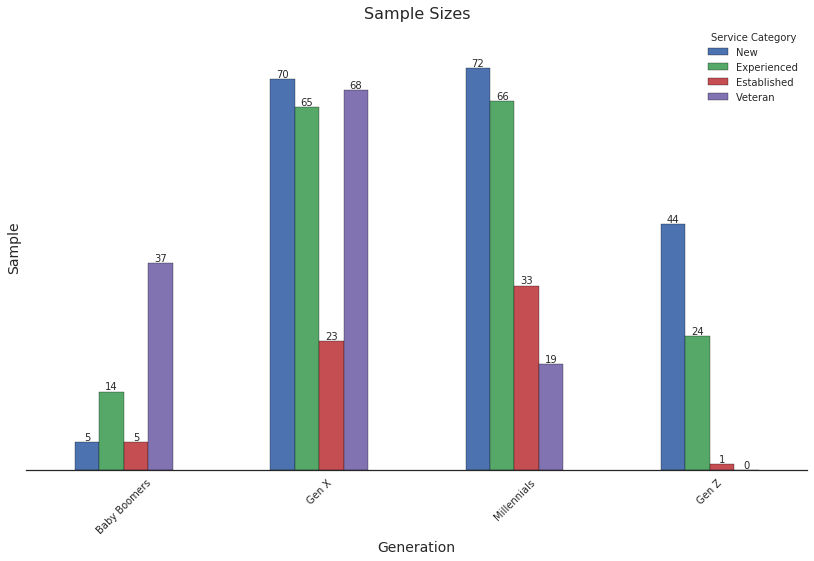

In [55]:
# Configuring the bar plot of the pivot tableplt.figure(figsize=(14,8))
plt.figure(figsize=(14,8))
sns.set_style("white")

size_plt = size_pv.plot(kind="bar", figsize=(14,8))

# Adding labels
plt.title("Sample Sizes", fontsize=16)
plt.xlabel("Generation", fontsize=14)
plt.ylabel("Sample", fontsize=14)
plt.yticks([])
plt.xticks(rotation=45)
plt.legend(title="Service Category", fontsize="medium")

# Removing spines
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Annotating the plot
annotations(size_plt, rd=".0f")

It was proposed by Sekaran, that sample sizes larger than 30 and less than 500 are appropriate for most research.

We can now see from this graph that only a few groups satisfy that category:

* From __Baby Boomers__:
    * Veteran
* From __Gen X__:
    * New
    * Experienced
    * Veteran
* From __Millennials__:
    * New
    * Experienced
    * Established
* From __Gen Z__:
    * New
    


## Conclusion 

The objective of this project was to analyse the data from the two exit survey collected by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE), to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From our analysis we can conclude that:

* `New` `Gen Z` employees are the most satisfied with their jobs
* `Established` `Millennials` are the least satisfied with their jobs
* `Baby Boomer` `Veterans` are more dissatisfied than `Millennial` `Veterans`
* The older employees tend to be more dissatisfied than the younger employees